## **CHAPTER 06 차원 축소**

## **01 차원 축소 개요**

**이 장에서는 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF에 대해서 알아본다.**

**차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다.**

> **일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 된다.**

> ![test](./img/데이터거리.png)

> **수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다.**

> **또한 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 크다.**

> **선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.**

**이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.**

> **가령 수십 개 이상의 피처가 있는 데이터의 경우 이를 시각적으로 표현해 데이터의 특성을 파악하기는 불가능하다.**

> **이 경우, 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현할 수 있다.**

> **또한 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.**

**일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다.**

> **피처 선택, 즉 특성 선택은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처를 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.**

> **피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것이다. 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이다.**

**피처 추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것이다.**

> **가령 학생을 평가하는 다양한 요소로 모의고사 성적, 종합 내신성적, 수능성적, 봉사활동, 대외활동, 학교 내외 수상경력 등과 관련된 여러 가지 피처로 돼 있는 데이터 세트라면 이를 학업 성취도, 커뮤니케이션 능력, 문제 해결력과 같은 더 함축적인 요약 특성으로 추출할 수 있다.**

**이러한 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미한다.(위의 학생 평가 요소는 사실 함축적인 의미를 인지하기 어려운 것은 아니다. 함축성의 의미가 무엇인지 예를 든 것일 뿐)**

**이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니고, 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다. PCA, SVD, NMF는 이처럼 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘이다.**

> **매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 이 알고리즘이 잘 활용되고 있다.**

**이 차원 축소 알고리즘은 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다.**

**이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(Overfiting) 영향력이 작아져서 오히려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올린다.**

> **이미지 자체가 가지고 있는 차원의 수가 너무 크기 때문에 비슷한 이미지라도 적은 픽셀의 차이가 잘못된 예측으로 이어질 수 있기 때문이다. 이 경우 함축적으로 차원을 축소하는 것이 예측에 도움**

![test](./img/주성분사진.png)

**차원 축소 알고리즘이 자주 사용되는 또 다른 영역은 텍스트 문서의 숨겨진 의미를 추출하는 것이다.**

> **문서는 많은 단어로 구성돼 있다. 문서를 만드는 사람은 어떤 의미나 의도를 가지고 문서를 작성하면서 단어를 사용하게 된다.**

> **일반적으로 사람의 경우 문서를 읽으면서 이 문서가 어떤 의미나 의도를 가지고 작성됐는지 쉽게 인지할 수 있다.**

**차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있다.**

> **SVD와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용된다.**

## **02 PCA(Princial Component Analysis)**

**선형결합(Linear combination)에 대한 수식적 개념: https://ratsgo.github.io/linear%20algebra/2017/03/23/linearity/**

**선형독립(Linear independence)과 선형변환(Linear transformation)에 대한 수식적 개념: https://ratsgo.github.io/linear%20algebra/2017/03/24/Ldependence/**

**사영(projection)에 대한 수식적 개념: https://ratsgo.github.io/linear%20algebra/2017/10/20/projection/**

**PCA의 수식적 개념:https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/**

### **PCA 개요**

**PCA(Principal Component Analysis)는 가장 대표적인 차원 축소 기법이다. PCA는 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법이다.**

> **PCA로 차원을 축소할 떄는 기존 데이터의 정보 유실이 최소화 되는 것이 당연하다.**

**이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 축소하는데, 이것이 PCA의 주성분이 된다.(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다.)**

![test](./img/pca1.png)

**2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 할 수 있다. 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식이다.**

![test](./img/pca2.png)

**이렇게 새롭게 생성된 축으로 데이터를 투영하고 새로운 축 기준으로 데이터를 표현한다.**

![test](./img/pca3.png)

**PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 한다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성한다.**

> **이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.**

**PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.**

**PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.**

> **이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.**

> **고유값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.**

**일반적으로 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미한다.**

> **이를 특정 벡터를 하나의 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것이다.**

**보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미한다.**

> **사람 키 변수를 X, 몸무게 변수를 Y라고 하면 공분산 Cov(X,Y) > 0 은 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미이다.**

> **공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이다.**

|  COV  |  `X`  |  `Y`  | `Z` | 
|:---|:---:|:---:|---:|
| `X` | **3.0** | -0.71 | -0.24 | 
| `Y` | -0.71 | **4.5** | 0.28 | 
| `Z` | -0.24 | 0.28 | **0.91**| 

**위 표에서 보면 공분산 행렬에서 대각선 원소는 각 변수(X, Y, Z)의 분산을 의미하며, 대각선 이외의 원소는 가능한 모든 변수 쌍의 공분산을 의미한다.**

> **X, Y, Z의 분산은 각각 3.0, 4.5, 0.91이고, X와 Y의 공분산은 -0.71, X와 Z의 공분산은 -0.24, Y와 Z의 공분산은 0.28이다.**

**고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭한다. 즉 ,Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)이다.**

**이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있다.**

> **예를 들어 2x2 행렬은 두 개의 고유벡터를, 3x3행렬은 3개의 고유벡터를 가질 수 있다.**

**이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용한다.**

**공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetric Matrix)이다.**

> **정방행렬은 열과 행이 같은 행렬을 지칭한다.**

> **정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬, 즉 A.T = A인 행렬을 대칭행렬이라 부른다.**

> **공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다.**

**대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있으며, 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있다는 것이다.**

**입력 데이터의 공분산 행렬을 A라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.**

![test](./img/고유값.jpg)

> **즉, 공분산 C는 고유벡터 직교 행렬, 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해된다.**

> **v(i)는 i번째 고유벡터를, λ(i)는 i번째 고유벡터의 크기를 의미한다.**

> **v(1)는 가장 분산이 큰 방향을 가진 고유벡터이며, v(2)는 v(1)에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터이다.**

**선형대수식까지 써가면서 강조하고 싶었던 것은 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것이다.**

> **1) 입력 데이터 세트의 공분산 행렬을 생성한다.**

> **2) 공분산 행렬의 고유벡터와 고유값을 계산한다.**

> **3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.**

> **4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.**

**PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것이다.**

In [1]:
# 붓꽃(Iris) 데이터 세트는 sepal length, sepal width, petal length, petal width의 4개의 속성으로 되어 있는데,
# 이 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해 본다.
# 먼저 사이킷런의 붓꽃 붓꽃 데이터를 load_iris() API를 이용해 로딩한 뒤 이 데이터를 더 편하게 시각화하기 위해 DataFrame으로 변환
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width'] # 칼럼명들을 columns에 할당
irisDF = pd.DataFrame(iris.data, columns=columns) # iris.data(feature)를 데이터 프레임으로 변환하고 기존의 칼럼명을 위에 지정한 columns명으로 변경
irisDF['target'] = iris.target # iris.target(labels)을 irisDF의 새로운 칼럼으로 추가
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


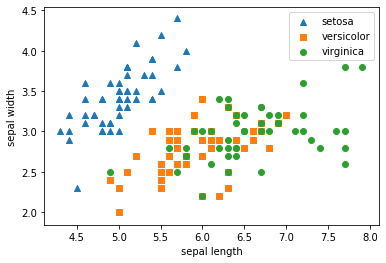

In [3]:
# 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화해본다.
# 2차원으로 표현하므로 두 개의 속성인 sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포를 나타낸다.
markers = ['^','s','o'] # setosa=세모, versicolor=네모, virginica=동그라미

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers): # i = index, makers = 그래프의 표시점들
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length'] # target이 0(setosa),1(versicolor),2(virginica) 일때 sepal_length(꽃받침 길이) 값들을 x_axis_data에 할당
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width'] # target이 0(setosa),1(versicolor),2(virginica) 일때 sepal_width(꽃받침 너비) 값들을 x_axis_data에 할당
    # x축은 x_axis_data, y축은 y_axis_data, marker(^,s,o), label=iris.target_names[i]는 각각의 레이블의 sepal_length와 sepal_width의 데이터 포인트를 그래프상에 표시 
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i]) 

# Setosa 품종의 경우 sepal width가 3.0 보다 크고 sepal length가 6.0 이하인 곳에 일정하게 분포돼 있다. Versicolor와 Verginica의 경우 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.
plt.legend() # 그래프 겹쳐그리기
plt.xlabel('sepal length') # x축 레이블명
plt.ylabel('sepal width') # y축 레이블명
plt.show()

**이제 PCA로 4개의 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화 한다.**

> **먼저 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해야 한다.**

> **PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.**

**따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.**

> **사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규분포로 모든 속성 값을 변경한다.**

In [4]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)
iris_scaled

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [5]:
irisDF # 스케일 변환 전

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_scaledDF = pd.DataFrame(iris_scaled, columns=['sepal_length','sepal_width','petal_length','petal_width','target'])
iris_scaledDF # 스케일 변환 후

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


In [7]:
# 이제 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환한다.
# 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공한다.
# PCA 클래스는 생성 파라미터로 n_components를 입력 받는다.
# n_components는 PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정
# 이후에 fit(입력 데이터 세트)과 transform(입력 데이터 세트)을 호출해 PCA로 변환을 수행한다.
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 컨포넌트를 2로 설정

# fit()과 transform을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print('iris_pca shape:',iris_pca.shape)

iris_pca shape: (150, 2)


In [8]:
# PCA객체의 transform() 메서드를 호출해 원본 데이터 세트를 (150,2)의 데이터 세트로 iris_pca 객체 변수로 반환
# iris_pca는 변환된 PCA 데이터 세트를 150 x 2 넘파이 행렬로 가지고 있다.
# 이를 DataFrame으로 변환한 뒤 데이터 값을 확인 해본다.
irisDF_pca = pd.DataFrame(iris_pca, columns=['pca_component_1','pca_component_2'])
irisDF_pca

,pca_component_1,pca_component_2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220
...,...,...
145,2.233024,0.389352
146,1.966862,-0.896264
147,1.928996,0.268890
148,1.806149,1.009217


In [9]:
irisDF_pca['target'] = iris.target

In [10]:
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


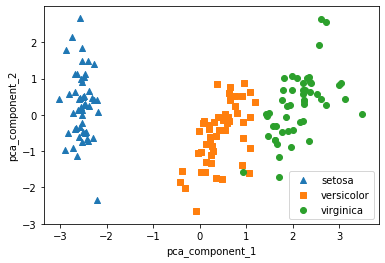

In [11]:
# 이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화 해본다.
# pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 붓꽃 품종이 어떻게 분포되는지 확인

# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^','s','o']

# pca_component_1을 x축, pc_component_2를 y축으로 산점도 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

**PCA 변환된 데이터 세트가 원본보다 더 명확하게 분리돼 있다. PCA로 변환 후에는 마치 클러스터링을 적용한 것과 같이 pca_component_1 값을 기준으로 비교적 명확한 구분이 가능하다.**

> **이는 PCA변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공한다.**

In [12]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


**첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 76.5%를 차지하며, 두 번째인 pca_component_2가 약 18.4%를 차지한다.**

> **따라서 PCA를 개 요소로만 변환해도 원본 데이터의 변동성을 95%를 설명할 수 있다.**

In [13]:
# 이번에는 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교한다.
# Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교한다.
# 먼저 원본 붓꽃 데이터에 랜덤 포레스트(Random Forest)를 적용한 결과
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156) # 랜덤포레스트 모델을 rcf에 할당 하이퍼 파라미터는 디폴트로 설정
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv=3) # 랜덤포레스트 모델로 학습데이터를 훈련하고 3-fold 교차검증을 실시
print(scores)

[0.98039216 0.92156863 0.97916667]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
# 이번에는 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트를 적용한다.
pca_X = irisDF_pca[['pca_component_1','pca_component_2']] # 4차원(4개의 feature)를 2차원(2개의 컴포넌트로)로 축소된 데이터를 pca_X에 할당
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3) # 랜덤포레스트 모델로 축소된 학습데이터를 훈련하고 3-fold 교차검증을 실시
print(scores_pca)

[0.96078431 1.         1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**원본 데이터 세트와 동일하거나 일부 검증 세트에서는 더 나은 정확도를 나타내고 있다.**

> **물론 이렇게 PCA 변환된 데이터 세트가 원본 데이터 세트보다 더 나은 예측 정확도를 나타내는 경우는 흔하지 않다. 대부분은 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다.**

> **위 붓꽃 데이터의 경우는 4개의 속성이 2개의 변환 속성이 돼도 예측 성능에 전혀 영향을 받지 않을 정도로 PCA 변환이 잘 적용됐음을 의미한다.**

**고차원의 데이터를 저차원의 데이터로 변환하면 직관적으로 이해하기도 편하며, 데이터의 주축을 이루는 속성이 어떤 것인지 쉽게 파악할 수 있다.**

In [15]:
# 다음으로는 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤,
# 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교한다.
# 사용할 데이터 세트는 UCI Machine Learning Repository에 있는 신용카드 고객 데이터 세트이다.

# 저장된 credit_card_xls 데이터 세트를 DataFrame으로 로딩
# 판다스는 엑셀 파일을 DataFrame으로 편리하게 로드하기 위해 read_excel()을 제공한다.
# 로드하려는 엑셀 파일명과 데이터가 있는 엑셀 시트명을 입력하면 된다.(해당 데이터 세트가 있는 엑셀 시트명은 'Data'이다.)
import pandas as pd
df = pd.read_excel('./credit_card.xls',sheet_name='Data',header=1) # header = 1 첫번째 행을 header로 지정
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
df = df.drop(labels='ID', axis=1) # 불필요한 칼럼을 삭제
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성을 가지고 있다. 이 중에서 'default payment next month'속성이 Target 값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0이다.**

In [17]:
# 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1으로 칼럼명을 변환하고,
# 'default payment next month' 칼럼도 칼럼명이 너무 길이서 'default'로 칼럼명을 변경한다.
# 이후 Target 속성인 'default' 칼럼을 y_target 변수로 별도로 저장하고 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame을 만든다.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True) # 칼럼명 변경
y_target = df['default'] # Target 칼럼 추출
X_features = df.drop('default',axis=1) # Target 칼럼을 제외

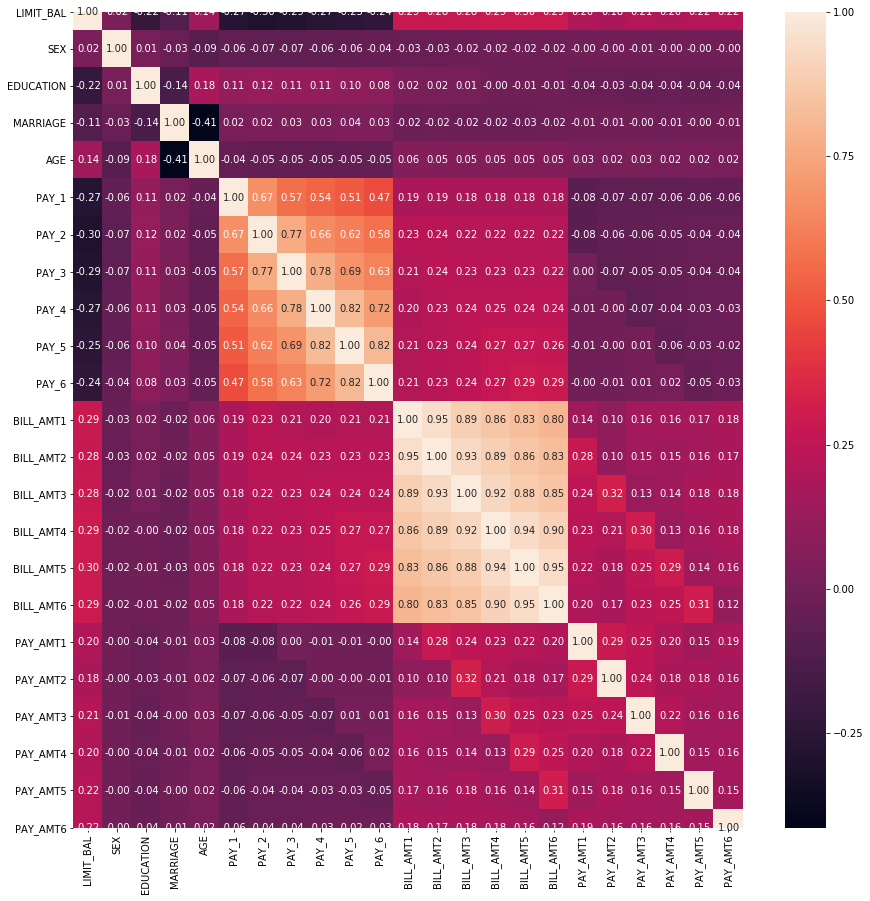

In [18]:
# 해당 데이터 세트는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높다.
# DataFrame의 corr()를 이용해 각 속성 간의 상관도를 구한 뒤 이를 시본(Seaborn)의 heatmap으로 시각화한다.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f') # annot(annotation 상관계수 값 표현), fmt = '.2f' 소수점 3번째 자리 반올림

In [19]:
# BILL_AMT1 ~ BILL_AMT6 6개의 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있다.
# 이보다는 낮지만 PAY_1 ~ PAY_6 까지의 속성 역시 상관도가 높다.
# 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.

# 이 BILL_AMT1 ~ BILL_AMT6까지 6개의 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아본다.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지의 6개 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)] # BILL_AMT1 ~ 6까지를 cols_bill에 할당
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler() 
df_cols_scaled = scaler.fit_transform(X_features[cols_bill]) # cols_bill 1 ~ 6 까지를 표준화
pca = PCA(n_components=2) # 주성분 분석을 통해 6개의 feature를 2개의 components로 압축
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_) # 2개의 컴포넌트로 원 데이터(BILL_AMT1 ~ 6까지)의 총 변동성을 약 95% 설명

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**단 2개의 PCA. 컴포넌트만으로도 6개의 feature의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개의 속성의 상관도는 매우 높다.**

In [20]:
# 이번에는 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교한다.
# 먼저 원본 데이터 세트에 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측한다.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156) # 랜덤포레스트 모델을 불러오고 n_estimators(트리의 개수)를 300개 생성
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy',cv=3) # 차원축소를 하지 않은 학습데이터를 훈련시키고 3-fold 교차 검증 

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [21]:
# 이번에는 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측을 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6) # PCA 모델 객체를 pca에 할당하고 6개의 컴포넌트로 지정
df_pca = pca.fit_transform(df_scaled) # 25개의 속성(feature)를 6개의 컨포넌트로 차원축소
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3) # 축소된 6개의 컨포넌트로 이루어진 학습 데이터를 학습시키고 3-fold 교차 검증을 수행

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7899 0.7982 0.801 ]
PCA 변환 데이터 세트 평균 정확도: 0.7964


**전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1 ~ 2% 정도의 예측 성능 저하만 발생했다.**

**여기서 주목해야할 점은 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이라고 생각된다.**

**PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있습니다만, 이보다 더 활발하게 적용되는 영역은 컴퓨터 비전(Computer Vision)분야이다. 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많다.**

## **03 LDA(Linear Discriminnant Analysis)**

**LDA(Linear Discriminnant Analysis)에 대한 수식적 개념: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/**

**LSA(Latent Sematic Anaysis)에 대한 수식적 개념: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/**

**LDA(Linear Discriminant Anaylsis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다.**

**LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.**

> **PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.**

**LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소한다.**

> **즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부 분산은 최대한 작게 가져가는 방식이다.**

![test](./img/LDA.png)

**위 그림처럼 좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부 분산이 작은 것을 표현한 것이다.**

**일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점이다.**

> **1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구한다.**

> **2. 클래스 내부 분산 행렬은 S(W), 클래스 간 분산 행렬을 S(B)라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.(식.P390)**

> **3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출한다.**

> **4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.**

### **붓꽃 데이터 세트에 LDA 적용하기**

**붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화한다.**

In [22]:
# 사이킷런 LDA를 LinearDiscriminantAnalysis 클래스로 제공한다.
# 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링한다.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

**2개의 컴포넌트로 붓꽃 데이터를 LDA 변환을 한다. PCA와 다르게 LDA에서 한 가지 유의해야 할 점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이라는 것이다.**

> **즉, 클래스의 결정 값이 변환 시에 필요하다. 다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의하자**

In [23]:
lda = LinearDiscriminantAnalysis(n_components=2) # Lda 모델 객체를 lda에 할당하고 컨포넌트를 2로 지정
# LDA는 PCA와 다르게 개별 클래스를 분별할 수 있는 기준을 유지시키기 위해 labels이 필요하다.(즉, 지도학습)
lda.fit(iris_scaled,iris.target) # 정규화된 학습데이터와 레이블을 통해 4개의 속성(feature)를 2개의 속성으로 차원을 축소한다.
iris_lda = lda.transform(iris_scaled) # 2개의 컴포넌트로 축소된 속성을 iris_lda에 할당
print(iris_lda.shape)

(150, 2)


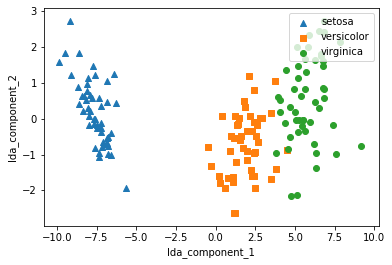

In [24]:
# 이제 LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현해본다.
# 소스 코드는 앞의 PCA예제와 큰 차이는 없다.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
iris_DF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
iris_DF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = iris_DF_lda[iris_DF_lda['target']==i]['lda_component_1'] # target이 0(setosa),1(versicolor),2(virginica) 일때 lda_component_1의 값들을 x_axis_data에 할당
    y_axis_data = iris_DF_lda[iris_DF_lda['target']==i]['lda_component_2'] # target이 0(setosa),1(versicolor),2(virginica) 일때 lda_component_2의 값들을 y_axis_data에 할당
    
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## **04 SVD(Singular Value Decomposition)**

### **SVD 개요**

**SVD(Singular Value Decomposition)에 대한 수식적 개념: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/**

**SVD 역시 PCA와 유사한 행렬 분해 기법이다. PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과열이 다른 행렬에도 적용할 수 있다.**

> **일반적으로 SVD는 m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.**

![test](./img/svd1.png)

**SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(Singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가진다. ∑ 는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. ∑ 이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.**

> **SVD는 A의 차원이 n x d일 때 U의 차원이 n x n, ∑ 의 차원이 n x d, V.T의 차원이 d x d으로 분해한다.**

![test](./img/SVD2.png)

**하지만 일반적으로는 다음과 같이 ∑ 의 비대각인 부분과 대각원소 중에 특이값이 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 ∑ 에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.**

> **이렇게 컴팩트한 형태로 SVD를 적용하면 A차원이 m x n일 때, U의 차원을 m x p, ∑ 의 차원을 p x p, V.T의 차원을 p x n으로 분해한다.**

![test](./img/svd4.png)

**Truncated SVD는 ∑ 의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다.**

> **일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다.**

> **넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD로 분해가 어떤 식으로 되는지 살펴본다.**

In [25]:
# 랜덤한 4 x 4 넘파이 행렬을 생성한다.
# 랜덤 행렬을 생성하는 이유는 행렬의 개별 로우끼리의 의존성을 없애기 위해서이다.

# 넘파이 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4 x 4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4) # 4x4의 랜덤 행렬 생성
print(np.round(a,3)) # 소수점 넷째 자리에서 반올림

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [26]:
# 이렇게 생성된 a 행렬에 SVD를 적용해 U, Sigma, V.T를 도출한다.
# SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V.T 행렬을 반환한다.
# Sigma 행렬의 경우, A = U∑V.T에서 ∑ 행렬을 나타내며, ∑ 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고,
# 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우마 1차원 행렬로 표현한다.

U, Sigma, Vt = svd(a) # 랜덤 행렬 a에 svd 적용
print(U.shape,Sigma.shape,Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3)) # 대각원소를 제외한 0인 부분을 생략
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [27]:
# 분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 본다.
# 원본 행렬로의 복원은 이 U,Simga,Vt를 내적하면 된다.
# 한 가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환해줘야한다.


Sigma_mat = np.diag(Sigma) # Sigma를 다시 0을 포함한 대칭행렬로 변환
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [28]:
# U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨을 알 수 있다.
# 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아본다.
# 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.around(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [29]:
# 이제 a 행렬은 이전과 다르게 로우 간 관계가 매우 높아졌다.
# 이 데이터를 SVD로 다시 분해해 본다.

# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


**이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미이다.(즉, 행렬의 랭크(Rank)가 2이다.)**

**이렇게 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원한다.**

> **이번에는 U, Sigma, Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U,Sigma,Vt의 데이터를 제외하고 복원한다.**

> **즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, Vt의 경우 선행 두 개의 행만 추출해 복원하는 것이다.**

In [30]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD는 ∑ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다.**

> **이렇게 분해하면 인위적으로 더 작은 차원의 U,∑,V.T로 분해되기 때문에 원본 행렬을 정확하게 다시 원복할 수 없다.**

**하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬에 근사할 수 있다.**

> **당연한 얘기지만, 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있다.**

In [31]:
# Truncated SVD는 넘파이가 아닌 사이파이에서만 지원된다.
# 사이파이는 SVD 뿐만 아니라 Truncated SVD도 지원한다.
# 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용한다.
# 임의의 원본 행렬 6 x 6을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤
# 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Simgma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여
# 복원된 데이터와 원본 데이터를 비교한다.
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6)) # 6 x 6의 랜덤 행렬 생성
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False) # full_matrices=False Sigma의 대각원소만 추출
print('\n 분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD를 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix,k=num_components) # 특잇값을 4개로 지정(즉, 상위 4개 추출)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape,Vt_tr.shape)
print('\nTruncated Sigma값 행렬:',Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)),Vt_tr)
print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

 Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.

**6 x 6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6,6)(6,)(6,6) 차원이지만, Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6,4),(4,)(4,6)로 각각 분해했다.**

**Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.**

### **사이킷런 TruncatedSVD 클래스를 이용한 변환**

**사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않는다. 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환한다.**

**원본 데이터를 Truncated SVD 방식으로 분해된 U x Sigma 행렬에 선형 변환해 생성한다.**

Text(0, 0.5, 'PCA Component 2')

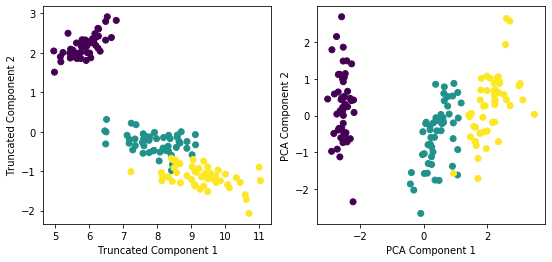

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2) # TSVD 모델의 객체를 tsvd에 할당하고 컨포넌트를 2로 설정
tsvd.fit(iris_ftrs) # 4개의 속성(feature)을 2개의 속성으로 변환
iris_tsvd = tsvd.transform(iris_ftrs) # 변환된 값을 iris_tsvd에 할당

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분

fig = plt.figure(figsize=(9,4))
ax1 = plt.subplot(1,2,1)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target) # x축을 component_1로 y축을 component_2로 하여 그래프상에 labels들을 표시(tsvd)
plt.xlabel('Truncated Component 1')
plt.ylabel('Truncated Component 2')

# 기존의 2차원 PCA로 변환된 붓꽃 데이터 세트. 품종은 색깔로 구분
ax2 = plt.subplot(1,2,2)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target) # x축을 component_1로 y축을 component_2로 하여 그래프상에 labels들을 표시(pca)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

**왼쪽에 있는 그림이 TruncatedSVD로 변환된 붓꽃 데이터 세트이고, 오른쪽은 비교를 위해서 PCA로 변환된 붓꽃 데이터 세트를 가져다 놓았다.**

**TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.**

**사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다.**

> **붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일하다.**

Text(0.5, 1.0, 'PCA Transformed')

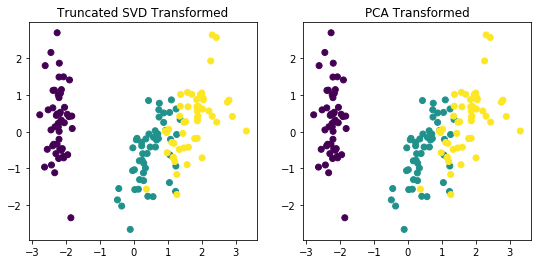

In [33]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2) #  
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에 , PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [34]:
# 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음을 알 수 있다.
print((iris_pca - iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.335053446896514e-15
-1.0191500421363742e-16


**모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.**

> **이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능하다.**

**SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다.**

> **또한 텍스트의 토픽 모델링 기업인 LSA(Latent Semantic Analysis)의 기반 알고리즘이다.**

## **05 NMF(Non-Negative Matrix Factorization)**

### **NMF 개요**

**NMF(Non-Negative Matrix Factorization)의 수식적 개념(1/2): https://bcho.tistory.com/1216**

**NMF(Non-Negative Matrix Factorization)의 수식적 개념(2/2): https://bcho.tistory.com/1220?category=555440**

**NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다.**

**NMF는 원본 행렬 내의 모든 원소 값이 모두 양수 (0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.**

![test](./img/NMF.jpg)

> **예를들어 W.shape(4,2), H.shape(2,6), V.shape(4,6)이라고 가정한다. 즉 4 x 6 원본 행렬 V는 4 x 2 행렬 W와 2 x 6 행렬 H로 근사해 분해될 수 있다.**

**행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통진한다.**

**이처럼 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행크기과 같고 열 크기 보다 작은 행렬)와 작고 넓은 행렬 H (원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해된다.**

> **이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다.** 

> **분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하고,**

> **분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬이다.**

**NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있다.**

Text(0, 0.5, 'NMF Component 2')

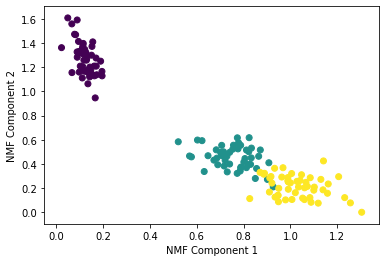

In [35]:
# 사이킷런에서 NMF는 NMF 클래스를 이용해 지원된다.
# 붓꽃 데이터 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화한다.
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

**NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용된다.**

> **또한 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용된다.**

> **사용자의 상품 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식이다.(이를 잠재 요소(Latent Factoring) 기반의 추천 방식이다.)**